## Market Basket Analysis with Association Rules Analysis and implementation of Decision Trees to help with Rules Selection

In this study, we will explore the essence of **Association Rules Analysis (ARA)**, with the applications of Market Basket Analysis. The Dataset can be found in [this URL](https://www.kaggle.com/datasets/rupakroy/market-basket-optimization). Here, we are going over the implementation of Association Rules Analysis from Scratch, and how we can enhance it with Decision Trees

### Association Rules Analysis

**Association Rules Analysis** is the algorithm to detect the if-then pattern in the dataset. For example, if a customer buys mineral water, they will buy milk according to the dataset. The essence of it is that, the rules selection were indicated with the concept from **basic probability theory**, for example, Conditional Probability and Bayes' Rules.

There are three main indicators to identify whether the rules are relevant:
- **Support**: The probability that the customers will buy both item sets together
- **Confidence**: The probability that the customers will buy the item set B, given that they buy the item set A
- **Lift**: The lift ratio, which we also used the probability of the customers buying the item set B into the considerations.

Often, the cutoff of each indicator, and the number of items in consideration were manually set by humans. However there are also some reasonable numbers that we can consider.

### Decision Tree

**Decision Tree** is a machine learning algorithm which is based on the concept of binary trees. The essence of it, they automatically write the if-else code according to the dataset. Its way of classification or prediction is really simple. For example, we can say that, if a customer buys mineral water, and milk, they will buy pancake. By the similarity, it can be the helper for the Association Rules Analysis in the Rules Selection.

### Implementation of Decision Tree in Association Rules Analysis

One of the disadvantages of Association Rules Analysis is the processing times in order to find the rules because they calculate the indicators with every rule possible in the given constraints of number of items. And one of the disadvantages of Decision Tree is, it cannot indicate how strong each rules are.

To visualize these disadvantages technically, if n in the number of item categories and k is the number of items we take into rules consideration, the Association Rules analysis would take approximately **C(n, k) ~ n^k** rules into consideration, meanwhile Decision Tree would take less than or equal to **2^k** rules in the decision, which is a lot less when the number of items get larger. Meanwhile Decision Tree don't know how strong their classification rules are, for example, they know that if the customer buys milk, they will buy mineral water, but they don't know how strong this rule is.

In this specific implementation, we tried to use Decision Tree to help with the **rules selection** of Association Rules Analysis by predicting whether the customer will buy this item, given that they buy other items for all items, in the given limited Tree Depths. Then we use Association Rules Analysis to evalute these rules.

---

### Data Preprocessing

In this portion, we preprocess the dataset from the arrays of the items in baskets into the binary table, which indicates whether the customer buys this item

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
basket = pd.read_csv('basket_dataset/Market_Basket_Optimisation.csv', header=None)

In [3]:
basket.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
table = []

In [5]:
list_products = np.array(list(set(basket.values.flatten())))

In [6]:
list_products = list_products[list_products != 'nan']

In [7]:
try:
    for b in basket.loc:
        table.append(np.isin(list_products, b.values).astype(int))
except:
    pass

In [8]:
basket_encoded = pd.DataFrame(table, columns=list_products)

In [9]:
basket_encoded.head()

,candy bars,protein bar,tea,spaghetti,melons,salt,cauliflower,gluten free bar,flax seed,champagne,...,black tea,fromage blanc,napkins,energy drink,whole wheat rice,carrots,antioxydant juice,fresh tuna,asparagus,eggs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


We then choose only some specific items for simplicity, for this, we choose the items that are bought at least 5% of the time.

In [10]:
basket_encoded = basket_encoded[basket_encoded.columns[basket_encoded.mean() > 0.05]][basket_encoded.sum(axis=1) > 1]

In [11]:
list_products = basket_encoded.columns

### Exploratory Data Analysis

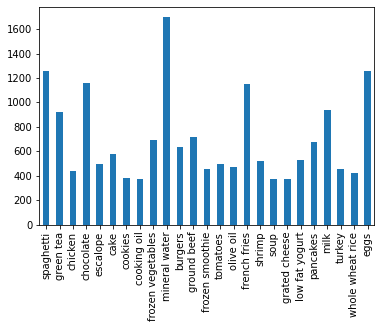

In [12]:
basket_encoded.sum(axis=0).plot(kind='bar')
plt.show()

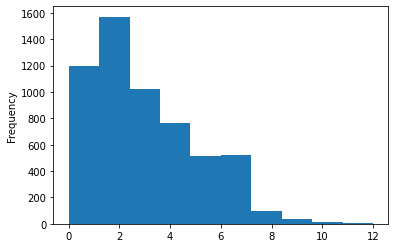

In [13]:
basket_encoded.sum(axis=1).plot(kind='hist')
plt.show()

### Exploration with Association Rules Analysis

We then define the functions to generate the permutations and possible combinations, here we use n=3, which indicate that there will be at most total of 3 items considered in the if-then rules

In [14]:
def generate_permutations(columns, n):
    if n == 1:
        return [(k,) for k in columns]
    permutations = []
    for i, c in enumerate(columns):
        permutations.extend([(c,) + p for p in generate_permutations(columns[i+1:], n-1)])
    return permutations

def generate_all_possible_combinations(columns, n=3):
    combinations = []
    for i in range(1, n+1):
        combinations.extend(generate_permutations(columns, i))
    return combinations 

In [15]:
generate_all_possible_combinations([1,2,3,4], 3)

[(1,),
 (2,),
 (3,),
 (4,),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 4),
 (2, 3, 4)]

In [16]:
all_possible_basket_combinations = generate_all_possible_combinations(list_products, n=3)

And we create the function to calculate the probabilities of each combination.

In [17]:
def calculate_combination_probability(df, combination):
    logic = None
    for product in combination:
        if logic is None:
            logic = df[product] == 1
            continue
        logic &= (df[product] == 1)
    return len(df[logic]) / len(df)

In [18]:
probabilities = {}
for combination in all_possible_basket_combinations:
    probabilities[frozenset(combination)] = calculate_combination_probability(basket_encoded, combination)

Then we generate all possible rules.

In [19]:
def generate_rules(combination):
    possible_comb = generate_all_possible_combinations(combination)
    rules = []
    for if_ in possible_comb:
        for then_ in possible_comb:
            if set(if_).intersection(set(then_)).__len__() != 0:
                continue
            rules.append((if_, then_))
    return rules

In [20]:
rules_generator = list(filter(lambda x: len(x) > 1, all_possible_basket_combinations))

In [21]:
rules = []

for combination in rules_generator:
    rules.extend(generate_rules(combination))

In [22]:
rules = list(set(rules))

In [23]:
rules[:5]

[(('cookies',), ('frozen vegetables', 'pancakes')),
 (('milk', 'eggs'), ('cake',)),
 (('shrimp',), ('olive oil', 'grated cheese')),
 (('shrimp', 'eggs'), ('milk',)),
 (('soup',), ('burgers', 'frozen smoothie'))]

We then calculate each indicators to verify the relevancy of each rule

In [24]:
rules_confidence = {}
lift = {}
support = {}

In [25]:
for (if_, then_) in rules:
    support[(if_, then_)] = probabilities[frozenset(if_ + then_)]
    if probabilities[frozenset(if_)] != 0:
        rules_confidence[(if_, then_)] = probabilities[frozenset(if_ + then_)] / probabilities[frozenset(if_)]
        if probabilities[frozenset(then_)] != 0:
            lift[(if_, then_)] = probabilities[frozenset(if_ + then_)] / (probabilities[frozenset(if_)] * probabilities[frozenset(then_)])

We then filter all rules with the given conditions, then we get the association rules

In [26]:
def association_rules(support_lower=0.05, confidence_lower=0.9, lift_lower=1):
    rules_list = list(lift.keys())
    return list(filter(lambda x: support[x] > support_lower and rules_confidence[x] > confidence_lower and lift[x] > lift_lower, rules_list))

In [27]:
pd.DataFrame(association_rules(support_lower=0.0005))

""


---

### Visualization of how we can use Decision Tree with Rules Selection

For example, we want to see the possible rules that a customer will buy milk. We then use the [Decision Tree Model from scikit-learn](https://scikit-learn.org/stable/modules/tree.html) to deal with Decision Trees

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
tree = DecisionTreeClassifier(max_depth=5)

In [30]:
interested_product = 'milk'

In [31]:
y = basket_encoded[interested_product]
X = basket_encoded.drop(interested_product, axis=1)

In [32]:
tree.fit(X, y)

DecisionTreeClassifier(max_depth=5)

We then define the function to get all possible rules from the tree that a customer will buy milk

In [33]:
def get_association_rules_from_tree(tree, feature_names, out):
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]

    # get ids of child nodes
    idx = np.argwhere(left == -1)[:,0]     

    def recurse(left, right, child, lineage=None):
        if lineage is None:
            buy = np.argmax(tree.tree_.value[child]) 
            lineage = [buy]
        if child in left:
            parent = np.where(left == child)[0].item()
            split = 'l'
        else:
            parent = np.where(right == child)[0].item()
            split = 'r'

        lineage.append((parent, split, threshold[parent], features[parent]))

        if parent == 0:
            lineage.reverse()
            return lineage
        else:
            return recurse(left, right, parent, lineage)
    
    rules = []

    currule = tuple()
    for child in idx:
        for node in recurse(left, right, child):
            if isinstance(node, np.int64):
                if node == 1:
                    rules.append((currule, out))
                currule = tuple()
                continue
            if node[1] == 'r':
                currule = (node[3],) + currule
    return rules


In [34]:
rules = get_association_rules_from_tree(tree, tree.feature_names_in_, out=('milk',))

Then we calculate the support, confidence and lift of the rules we obtained from Decicion Tree

In [35]:
support_milk = {}
confidence_milk = {}
lift_milk = {}

In [36]:
for comb1, comb2 in rules:
    support_milk[(comb1, comb2)] = calculate_combination_probability(basket_encoded, comb1 + comb2)
    confidence_milk[(comb1, comb2)] = support_milk[(comb1, comb2)] / calculate_combination_probability(basket_encoded, comb1)
    lift_milk[(comb1, comb2)] = confidence_milk[(comb1, comb2)] / calculate_combination_probability(basket_encoded, comb2)

In [37]:
lift_milk

{(('cooking oil', 'eggs', 'frozen vegetables'), ('milk',)): 3.6002004635720097,
 (('burgers', 'whole wheat rice', 'soup'), ('milk',)): 4.896272630457934,
 (('cooking oil', 'frozen vegetables', 'soup'), ('milk',)): 3.0601703940362084,
 (('chicken', 'frozen vegetables', 'soup'), ('milk',)): 5.246006389776358,
 (('mineral water', 'frozen vegetables', 'soup'),
  ('milk',)): 3.7044167927806737,
 (('tomatoes', 'mineral water', 'frozen vegetables', 'soup'),
  ('milk',)): 5.3552981895633645}

---

### Class Implementation of Association Rules and Association Trees

In this portion of the code, we create the generalized version of models for **Association Rules Analysis**, with its combination with the **Decision Trees**.

In [38]:
from dataclasses import dataclass

In [39]:
@dataclass
class AssociationRule:
    if_: tuple
    then_: tuple
    support: float
    confidence: float
    lift: float

In [40]:
class AssociaitionRulesModel:
    def __init__(self, support_lower: float, confidence_lower: float, lift_lower: float, n_products=3):
        self.support_lower = support_lower
        self.confidence_lower = confidence_lower
        self.lift_lower = lift_lower
        self.n_products = n_products
    
    @staticmethod
    def generate_permutations(columns: list, n: int):
        if n == 1:
            return [(k,) for k in columns]
        permutations = []
        for i, c in enumerate(columns):
            permutations.extend([(c,) + p for p in generate_permutations(columns[i+1:], n-1)])
        return permutations

    @staticmethod
    def generate_all_possible_combinations(columns: list, n: int):
        combinations = []
        for i in range(1, n+1):
            combinations.extend(generate_permutations(columns, i))
        return combinations 
    
    @staticmethod
    def calculate_combination_probability(df: pd.DataFrame, combination: tuple):
        logic = None
        for product in combination:
            if logic is None:
                logic = df[product] == 1
                continue
            logic &= (df[product] == 1)
        return len(df[logic]) / len(df)
    
    def calculate_all_probabilities(self, X: pd.DataFrame):
        self.probabilities_ = {}
        for combination in self.all_possible_combinations_:
            self.probabilities_[frozenset(combination)] = calculate_combination_probability(X, combination)
        return self.probabilities_
    
    def generate_all_rules(self):
        rules = []
        rules_generator = list(filter(lambda x: len(x) > 1, self.all_possible_combinations_))
        for combination in rules_generator:
            rules.extend(self.generate_combination_rules(combination))
        self.all_rules_ = list(set(rules))
        return self.all_rules_
    
    def generate_combination_rules(self, combination: tuple):
        possible_comb = self.generate_all_possible_combinations(combination, self.n_products)
        rules = []
        for if_ in possible_comb:
            for then_ in possible_comb:
                if set(if_).intersection(set(then_)).__len__() != 0:
                    continue
                rules.append((if_, then_))
        return rules
    
    def calculate_rule_metric(self, rule: tuple):
        if_, then_ = rule
        support = self.probabilities_[frozenset(if_ + then_)]
        confidence = 0
        lift = 0
        if self.probabilities_[frozenset(if_)] != 0:
            confidence = self.probabilities_[frozenset(if_ + then_)] / self.probabilities_[frozenset(if_)]
            if self.probabilities_[frozenset(then_)] != 0:
                lift = self.probabilities_[frozenset(if_ + then_)] / (self.probabilities_[frozenset(if_)] * self.probabilities_[frozenset(then_)])
        association_rule = AssociationRule(if_=if_, then_=then_, support=support, confidence=confidence, lift=lift)
        return association_rule
    
    def calculate_metrics(self):
        self.association_metrics_ = []
        for rule in self.all_rules_:
            self.association_metrics_.append(self.calculate_rule_metric(rule))
        return self.association_metrics_
    
    def association_rules(self):
        return list(filter(lambda x: x.support > self.support_lower and x.confidence > self.confidence_lower and x.lift > self.lift_lower, self.association_metrics_))

    def fit(self, X: pd.DataFrame):
        self.feature_names_ = X.columns
        self.all_possible_combinations_ = self.generate_all_possible_combinations(X.columns, self.n_products)
        self.calculate_all_probabilities(X)
        self.generate_all_rules()
        self.calculate_metrics()
        self.association_rules_ = self.association_rules()
    
    def accuracy(self, Xtest: pd.DataFrame):
        test_rules = []
        for rule in self.association_rules_:
            if_ = rule.if_; then_ = rule.then_
            support = self.calculate_combination_probability(Xtest, if_ + then_)
            if_prob = self.calculate_combination_probability(Xtest, if_)
            then_prob = self.calculate_combination_probability(Xtest, then_)
            confidence = support / if_prob if if_prob != 0 else 0
            lift = confidence / then_prob if then_prob != 0 else 0
            test_rule = AssociationRule(if_, then_, support, confidence, lift)
            test_rules.append(test_rule)
        return test_rules
            

In [41]:
class AssociationTree(AssociaitionRulesModel):
    def __init__(self, support_lower: float, confidence_lower: float, lift_lower: float, n_products=3):
        super().__init__(support_lower, confidence_lower, lift_lower, n_products)
        self.probabilities_ = {}
    
    @staticmethod
    def get_association_rules_from_tree(tree: DecisionTreeClassifier, feature_names: list, out: tuple):
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]

        # get ids of child nodes
        idx = np.argwhere(left == -1)[:,0]     

        def recurse(left, right, child, lineage=None):
            if lineage is None:
                buy = np.argmax(tree.tree_.value[child]) 
                lineage = [buy]
            if child in left:
                parent = np.where(left == child)[0].item()
                split = 'l'
            else:
                parent = np.where(right == child)[0].item()
                split = 'r'

            lineage.append((parent, split, threshold[parent], features[parent]))

            if parent == 0:
                lineage.reverse()
                return lineage
            else:
                return recurse(left, right, parent, lineage)
        
        rules = []

        currule = tuple()
        for child in idx:
            for node in recurse(left, right, child):
                if isinstance(node, np.int64):
                    if node == 1:
                        rules.append((currule, out))
                    currule = tuple()
                    continue
                if node[1] == 'r':
                    currule = (node[3],) + currule
        return rules
    
    def generate_feature_name_rules(self, X, feature_name):
        tree = DecisionTreeClassifier(max_depth=self.n_products)
        y = X[feature_name]
        Xtree = X.drop(feature_name, axis=1)
        tree.fit(Xtree, y)
        return self.get_association_rules_from_tree(tree, tree.feature_names_in_, out=(feature_name,))

    def generate_all_rules(self, X: pd.DataFrame):
        self.all_rules_ = []
        for feature_name in self.feature_names_:
            rules = self.generate_feature_name_rules(X, feature_name)
            self.all_rules_.extend(rules)
    
    def calculate_rule_metric(self, rule: tuple):
        if_, then_ = rule
        if frozenset(if_ + then_) not in self.probabilities_.keys():
            p = self.calculate_combination_probability(self._X, if_ + then_)
            self.probabilities_[frozenset(if_ + then_)] = p
        if frozenset(if_) not in self.probabilities_.keys():
            p = self.calculate_combination_probability(self._X, if_)
            self.probabilities_[frozenset(if_)] = p
        if frozenset(then_) not in self.probabilities_.keys():
            p = self.calculate_combination_probability(self._X, then_)
            self.probabilities_[frozenset(then_)] = p
        support = self.probabilities_[frozenset(if_ + then_)]
        confidence = 0
        lift = 0
        if self.probabilities_[frozenset(if_)] != 0:
            confidence = self.probabilities_[frozenset(if_ + then_)] / self.probabilities_[frozenset(if_)]
            if self.probabilities_[frozenset(then_)] != 0:
                lift = self.probabilities_[frozenset(if_ + then_)] / (self.probabilities_[frozenset(if_)] * self.probabilities_[frozenset(then_)])
        association_rule = AssociationRule(if_=if_, then_=then_, support=support, confidence=confidence, lift=lift)
        return association_rule
    
    def fit(self, X: pd.DataFrame):
        self._X = X.copy()
        self.feature_names_ = X.columns
        self.generate_all_rules(X)
        self.calculate_metrics()
        self.association_rules_ = self.association_rules()

We then compare the model using the **train-test split**

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
train, test = train_test_split(basket_encoded, random_state=0)

We then fit both models with the maximum number of items in the if condition of 4

In [44]:
assotree = AssociationTree(0.003, 0.5, 3, 4)
assotree.fit(train)

In [45]:
asso = AssociaitionRulesModel(0.003, 0.5, 3, 5)
asso.fit(train)

We can see that the runtime of Association Rules with the Support of Decision Tree is significantly lower than the one without tree.

We then obtain the accuracy (TBC) of each rule generated by the models

In [46]:
normal_model_accuracy = asso.accuracy(test)

In [47]:
tree_model_accuracy = assotree.accuracy(test)

In [48]:
def get_average_parameters(list_rules):
    avg_support = sum([x.support for x in list_rules]) / len(list_rules)
    avg_confidence = sum([x.confidence for x in list_rules]) / len(list_rules)
    avg_lift = sum([x.lift for x in list_rules]) / len(list_rules)
    return {
        'support': avg_support,
        'confidence': avg_confidence,
        'lift': avg_lift
    }

In [49]:
get_average_parameters(normal_model_accuracy)

{'support': 0.00230180397195011,
 'confidence': 0.39017328825021136,
 'lift': 2.039960278189935}

In [50]:
get_average_parameters(tree_model_accuracy)

{'support': 0.003479471120389701,
 'confidence': 0.6777777777777779,
 'lift': 3.483335536680522}

We then see the rules of each model

In [51]:
pd.DataFrame(asso.association_rules_).sort_values(by='lift', ascending=False)

,if_,then_,support,confidence,lift
4,"(spaghetti, chicken, olive oil)","(milk,)",0.003016,0.764706,4.721894
11,"(spaghetti, frozen vegetables, mineral water, ...","(milk,)",0.003016,0.650000,4.013610
1,"(frozen vegetables, mineral water, soup)","(milk,)",0.003712,0.571429,3.528449
6,"(cookies, burgers)","(green tea,)",0.003712,0.533333,3.441118
2,"(chicken, olive oil)","(milk,)",0.004640,0.555556,3.430436
9,"(spaghetti, frozen vegetables, eggs)","(milk,)",0.004408,0.542857,3.352026
10,"(frozen vegetables, ground beef, eggs)","(milk,)",0.003016,0.541667,3.344675
12,"(frozen vegetables, mineral water, turkey)","(milk,)",0.003016,0.541667,3.344675
5,"(frozen vegetables, ground beef, olive oil)","(spaghetti,)",0.003248,0.700000,3.261622
8,"(frozen vegetables, ground beef, shrimp)","(spaghetti,)",0.003248,0.700000,3.261622


In [52]:
pd.DataFrame(assotree.association_rules_).sort_values(by='lift', ascending=False)

,if_,then_,support,confidence,lift
2,"(frozen vegetables, mineral water, soup)","(milk,)",0.003712,0.571429,3.528449
1,"(burgers, cookies)","(green tea,)",0.003712,0.533333,3.441118
0,"(shrimp, frozen vegetables, ground beef)","(spaghetti,)",0.003248,0.700000,3.261622


Let me know what you think!

---